<a href="https://colab.research.google.com/github/navseducation/Gen-AI-Purdue-Course/blob/main/Advanced_Deep_Learning_Demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Practical Introduction to Deep Learning: Vision & Language

Welcome! Over the next two days, we will explore the exciting world of deep learning. Our goal is not to build complex models from scratch, but to understand the *power* of modern AI by using **pre-trained models**.

We will see how a few lines of Python can allow us to perform incredible tasks like:
- Recognizing objects in images.
- Generating human-like text.
- Understanding the sentiment of a sentence.

Let's get started!

---
# Day 1: The World of Computer Vision

Today, we focus on **Computer Vision**—the field of AI that teaches computers to "see" and interpret the visual world. We'll explore three key tasks: Image Classification, Object Detection, and Image Segmentation.

### Setup for Day 1

First, we need to install the necessary libraries. `torch` and `torchvision` provide the core deep learning framework and models, `transformers` from Hugging Face gives us easy access to pre-trained models, and `Pillow` helps with image manipulation.

In [ ]:
!pip install torch torchvision transformers pillow requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

### Demo 1: Image Classification with CNNs

**Concept:** **Convolutional Neural Networks (CNNs)** are the workhorses of computer vision. They are brilliant at finding patterns in images. Image Classification is the task of assigning a single label to an entire image (e.g., "this is a picture of a cat").

**Demo:** We'll use a famous pre-trained model called **ResNet** to identify the object in a sample image.

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import requests

# 1. Load a pre-trained model
# We set pretrained=True to download a model that has already been trained on millions of images.
model_resnet = models.resnet50(pretrained=True)
model_resnet.eval() # Set the model to evaluation mode

# 2. Define the image transformations
# Pre-trained models expect images to be a specific size and have their pixel values normalized.
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 3. Load and preprocess an image from a URL
#url = 'https://images.unsplash.com/photo-1583337130417-3346a1be7dee?auto=format&fit=crop&w=1000&q=80'
url = 'https://pixabay.com/photos/bird-blue-clouds-weather-pen-8788491/'
img = Image.open(requests.get(url, stream=True).raw)
img_preprocessed = preprocess(img)
batch_img_tensor = torch.unsqueeze(img_preprocessed, 0) # Add a 'batch' dimension

# 4. Make a prediction
with torch.no_grad(): # We don't need to calculate gradients for inference
    output = model_resnet(batch_img_tensor)

# 5. Decode the prediction
# The output is a tensor of scores for 1000 different classes. We find the class with the highest score.
_, index = torch.max(output, 1)

# Load the class labels
LABELS_URL = 'https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json'
labels = requests.get(LABELS_URL).json()

prediction = labels[index[0].item()]

print(f"The model predicts this is a: {prediction}")
img

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7fbd383566b0>

### Demo 2: Object Detection

**Concept:** Object Detection goes a step further. Instead of just one label, it identifies *multiple* objects in an image and draws a **bounding box** around each one.

**Demo:** We'll use a powerful pre-trained **YOLO (You Only Look Once)** model from Hugging Face Transformers to find objects in a busy street scene.

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


Detected objects:
- car with confidence 0.58
- person with confidence 0.95
- traffic light with confidence 0.96
- truck with confidence 0.92
- person with confidence 0.83
- handbag with confidence 0.62
- person with confidence 0.69
- handbag with confidence 0.80
- backpack with confidence 0.88
- traffic light with confidence 0.97
- person with confidence 0.79
- person with confidence 0.98
- person with confidence 0.92
- handbag with confidence 0.96
- car with confidence 0.95
- person with confidence 0.95
- truck with confidence 0.98
- car with confidence 0.99
- traffic light with confidence 0.90
- car with confidence 0.75
- car with confidence 0.99
- car with confidence 0.93
- car with confidence 0.69
- person with confidence 0.61
- car with confidence 0.90
- truck with confidence 0.98
- person with confidence 0.98
- car with confidence 0.75
- bus with confidence 0.88
- car with confidence 0.89
- truck with confidence 0.85
- car with confidence 0.94
- traffic light with confidence 0.92

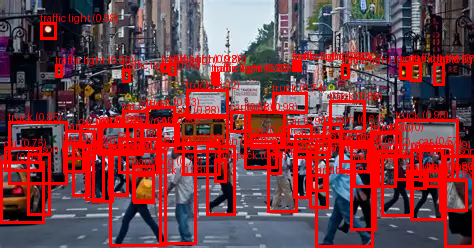

In [ ]:
from transformers import pipeline
from PIL import Image, ImageDraw, ImageFont
import requests

# 1. Load the pre-trained object detection pipeline
# This pipeline automatically handles the model loading, preprocessing, and postprocessing.
object_detector = pipeline('object-detection')

# 2. Load an image with multiple objects
url = 'https://tse1.mm.bing.net/th/id/OIP.zxKIH61D8swSwuelyI6oNQHaD4?rs=1&pid=ImgDetMain&o=7&rm=3'
img = Image.open(requests.get(url, stream=True).raw)

# 3. Perform object detection
results = object_detector(img)

# 4. Draw the bounding boxes on the image
draw = ImageDraw.Draw(img)
for result in results:
    box = result['box']
    label = result['label']
    score = result['score']

    # Draw the box
    draw.rectangle([(box['xmin'], box['ymin']), (box['xmax'], box['ymax'])], outline='red', width=3)
    # Draw the label
    draw.text((box['xmin'], box['ymin'] - 10), f"{label} ({score:.2f})", fill='red')

print("Detected objects:")
for result in results:
    print(f"- {result['label']} with confidence {result['score']:.2f}")

img

### Demo 3: Image Segmentation

**Concept:** This is the most detailed vision task. **Image Segmentation** classifies every single *pixel* in an image, creating a precise mask for each object. It's like coloring in the objects.

**Demo:** We'll use a **DeepLabV3** model to segment a picture of a cat.

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/172M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

Device set to use cuda:0


model.safetensors:   0%|          | 0.00/172M [00:00<?, ?B/s]

`label_ids_to_fuse` unset. No instance will be fused.


Segmentation results:
- Found a 'floor-wood' with confidence 1.00
- Found a 'LABEL_200' with confidence 1.00
- Found a 'cat' with confidence 1.00


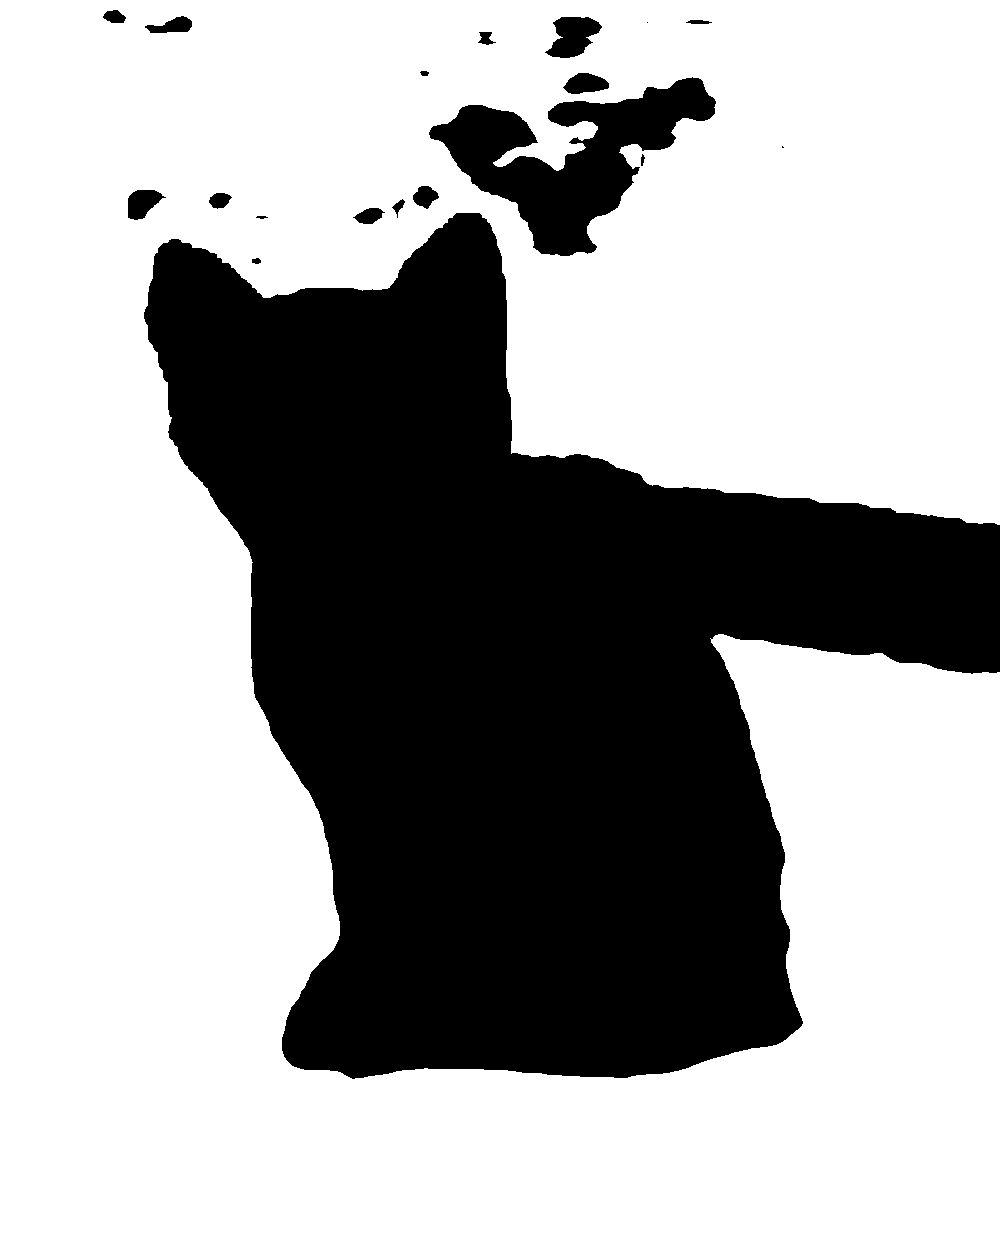

In [ ]:
from transformers import pipeline
from PIL import Image
import requests

# 1. Load the image segmentation pipeline
segmenter = pipeline("image-segmentation", model="facebook/detr-resnet-50-panoptic")

# 2. Load an image
url = "https://images.unsplash.com/photo-1574144611937-0df059b5ef3e?auto=format&fit=crop&w=1000&q=80"
img = Image.open(requests.get(url, stream=True).raw)

# 3. Perform segmentation
results = segmenter(img)

# 4. Visualize the results
print("Segmentation results:")
for result in results:
    print(f"- Found a '{result['label']}' with confidence {result['score']:.2f}")

# The pipeline returns the original image and a list of masks
segmented_image = results[0]['mask'] # Let's just view the first (and likely only) mask
segmented_image

---
# Day 2: The Power of Language and Sequences

Today, we dive into **Natural Language Processing (NLP)**. We'll see how models can understand, generate, and analyze human language. The key architecture behind modern NLP is the **Transformer**.

### Demo 4: Text Generation with GPT-2

**Concept:** Models like **RNNs, LSTMs**, and now primarily **Transformers** can process sequential data like text. They can "remember" what came before to predict what comes next. This allows them to generate coherent paragraphs.

**Demo:** We'll use the famous **GPT-2** model to continue a story from a starting prompt.

In [ ]:
from transformers import pipeline

# 1. Load the text generation pipeline
text_generator = pipeline('text-generation', model='gpt2')

# 2. Define a starting prompt
prompt = "In a world where dragons rule the skies, a young hero discovered a hidden power"

# 3. Generate text
generated_text = text_generator(prompt, max_length=100, num_return_sequences=1)

print("--- AI Generated Story ---")
print(generated_text[0]['generated_text'])

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


--- AI Generated Story ---
In a world where dragons rule the skies, a young hero discovered a hidden power—his own. From the dragon's grasp, the boy could save the world from dragons.


"I'm so excited to meet you!" A voice shouted from the back of the room. It was the voice of a young man. The boy had been a young boy, and now he was back in a world that was different.


"Is this my boy? That's what I'm looking for!" The man began to run.


"You can take me. It's not that I'm a bad boy, it's just that I've always been kind of a little bit awkward around him. I just want to talk to him. I want to play with him and see if he can help out on his own."


A voice whispered to the boy. The boy had been looking for the dragon in the lake, but his eyes began to roll back in his head.


"You're a cute little boy." The voice said, making the boy flinch.


The boy looked up at the voice. He was stunned.


"You're a cute little boy. So cute. So adorable. You're like an angel with wings and wings!

### Demo 5: Sentiment Analysis with Transformers

**Concept:** The **Transformer** architecture uses a mechanism called **Attention** to weigh the importance of different words in a sentence. This makes it incredibly powerful for understanding context. Sentiment analysis is the task of classifying text as positive, negative, or neutral.

**Demo:** We'll use a specialized Transformer model to analyze the sentiment of different movie reviews.

In [ ]:
from transformers import pipeline

# 1. Load the sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

# 2. Analyze a positive sentence
positive_review = "I absolutely loved this movie! The acting was superb and the story was breathtaking."
result_pos = sentiment_analyzer(positive_review)
print(f"Review: '{positive_review}'")
print(f"Result: {result_pos[0]['label']} with a score of {result_pos[0]['score']:.2f}\n")

# 3. Analyze a negative sentence
negative_review = "The film was a complete disaster. It was boring, poorly written, and a waste of time."
result_neg = sentiment_analyzer(negative_review)
print(f"Review: '{negative_review}'")
print(f"Result: {result_neg[0]['label']} with a score of {result_neg[0]['score']:.2f}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


Review: 'I absolutely loved this movie! The acting was superb and the story was breathtaking.'
Result: POSITIVE with a score of 1.00

Review: 'The film was a complete disaster. It was boring, poorly written, and a waste of time.'
Result: NEGATIVE with a score of 1.00


### Demo 6: Translation with Transformers

**Concept:** Transformers excel at sequence-to-sequence tasks, where an input sequence (a sentence in one language) is transformed into an output sequence (the same sentence in another language).

**Demo:** We'll use a pre-trained model to translate English text into German.

In [ ]:
from transformers import pipeline

# 1. Load the translation pipeline
translator = pipeline('translation_en_to_de', model='Helsinki-NLP/opus-mt-en-de')

    # 2. Define the text to be translated
english_text = "My name is Wolfgang and I live in Berlin."

# 3. Translate the text
german_translation = translator(english_text)

print(f"English Original: {english_text}")
print(f"German Translation: {german_translation[0]['translation_text']}")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0


English Original: My name is Wolfgang and I live in Berlin.
German Translation: Mein Name ist Wolfgang und ich lebe in Berlin.


# Course Conclusion

Congratulations! You've successfully used pre-trained deep learning models to perform advanced tasks in both computer vision and natural language processing.

You've seen that you don't need to be a machine learning expert to start applying the power of AI. With libraries like PyTorch and Hugging Face Transformers, the most advanced models in the world are just a few lines of code away.